<a href="https://colab.research.google.com/github/Harshra1-ultra/CNN/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 349.7 MB 35 kB/s 
     |████████████████████████████████| 496 kB 47.8 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 3.1 MB 28.5 MB/s 


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input , Conv2D , Dense , Flatten , Dropout
from tensorflow.keras.models import Model 



In [76]:
#import tensorflow as tf 
#from tensorflow import keras


# fashion mnist 
fashion_mnist= tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test , y_test)=fashion_mnist.load_data()
x_train, y_train = x_test/255.0 , y_test/255.0

print("x_train data" , x_train.shape)




x_train data (10000, 28, 28)


In [77]:
# the data is only 2D
x_train= np.expand_dims(x_train, -1 )
x_test =np.expand_dims(x_test, -1)
print ( x_train.shape )

(10000, 28, 28, 1)


In [78]:
#number of classes 
K= len(set (y_train))
print ('number of classes' , K)

number of classes 10


In [79]:
i= Input(shape =x_train[0].shape)
x = Conv2D(32 ,(3, 3), strides=2, activation='relu')(i)
x = Conv2D(64 ,(3, 3), strides=2, activation='relu')(x)

x = Conv2D(128 ,(3, 3), strides=2, activation='relu')(x)
x= Flatten()(x)
x= Dropout (0.2 )(x)
x= Dense(K , activation='softmax')(x)
model = Model(i , x )

In [80]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train , y_train , validation_data=(x_test , y_test), epochs= 15 )

Epoch 1/15
313/313 [==============================] - 5s 14ms/step - loss: 0.0397 - accuracy: 0.0997 - val_loss: 11086.3740 - val_accuracy: 0.1000
Epoch 2/15
313/313 [==============================] - 4s 14ms/step - loss: 3.3379e-10 - accuracy: 0.1000 - val_loss: 11086.3896 - val_accuracy: 0.1000
Epoch 3/15
313/313 [==============================] - 4s 14ms/step - loss: 3.4571e-10 - accuracy: 0.1000 - val_loss: 11086.4053 - val_accuracy: 0.1000
Epoch 4/15
313/313 [==============================] - 4s 14ms/step - loss: 5.6028e-10 - accuracy: 0.1000 - val_loss: 11086.4678 - val_accuracy: 0.1000
Epoch 5/15
313/313 [==============================] - 4s 14ms/step - loss: 2.8610e-10 - accuracy: 0.1000 - val_loss: 11086.5020 - val_accuracy: 0.1000
Epoch 6/15
313/313 [==============================] - 4s 14ms/step - loss: 4.4107e-10 - accuracy: 0.1000 - val_loss: 11086.5898 - val_accuracy: 0.1000
Epoch 7/15
313/313 [==============================] - 4s 14ms/step - loss: 5.7220e-10 - accuracy: 

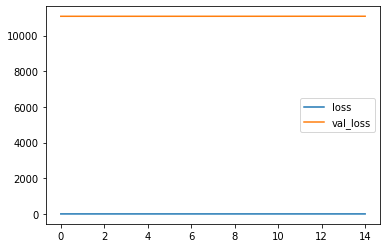

In [81]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'] , label ='loss')
plt.plot(r.history['val_loss'] , label ='val_loss')
plt.legend()


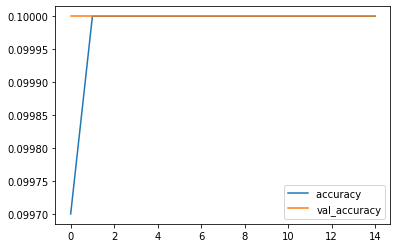

In [108]:
plt.plot(r.history['accuracy'] , label ='accuracy ')
plt.plot(r.history['val_accuracy'] , label ='val_accuracy')
plt.legend() 

confusion matrix without normalization 
[[1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]]


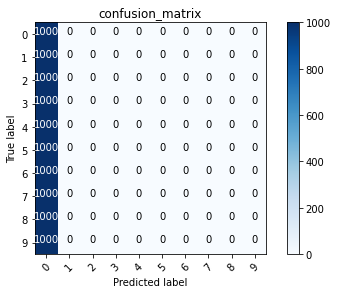

In [117]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes , normalize = False , title = "confusion_matrix" , cmap=plt.cm.Blues ):
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalize confusion matrix ')
  else :
      print('confusion matrix without normalization ')
  print(cm)
  plt.imshow (cm, interpolation='nearest' , cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks, classes , rotation=45)
  plt.yticks(tick_marks, classes)

  fmt='.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center", color="white" if cm[i, j]> thresh else  "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel( 'Predicted label') 
  plt.show()
    
p_test = model.predict (x_test).argmax (axis=1) 
cm = confusion_matrix(y_test, p_test) 
plot_confusion_matrix(cm, list(range(10)))

NameError: ignored

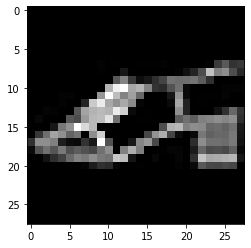

In [126]:
misclassified_idx= np.where (p_test != y_test)[0] 
i = np.random.choice (misclassified_idx)
plt.imshow (x_test[i].reshape (28,28), cmap= "gray")

# Show some misclassified examples

plt.title("True label:%s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));